In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random

In [2]:
matplotlib.use('nbagg')

In [3]:
df = pd.read_csv('data_tidy.csv')
df

,Person,Interval,Pressing Round,Time,PCT Error
0,1,1,1,1.11,11.00
1,1,1,2,2.13,6.50
2,1,1,3,3.29,9.67
3,1,1,4,4.53,13.25
4,1,1,5,6.04,20.80
5,1,3,1,2.69,-10.33
6,1,3,2,5.35,-10.83
7,1,3,3,8.00,-11.11
8,1,3,4,9.99,-16.75
9,1,3,5,13.62,-9.20


In [4]:
intv_sum = pd.DataFrame({
    'Interval (s)': [1 for _ in range(5)] + 
                     [3 for _ in range(5)] +
                     [5 for _ in range(5)],
    'Round of Pressing': [i for i in range(1, 6)]*3
})

In [5]:
intv_sum

,Interval (s),Round of Pressing
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,3,1
6,3,2
7,3,3
8,3,4
9,3,5


In [6]:
mxs = []

for interval in [1, 3, 5]:
    for pressing in range(1, 6):
        mxs.append(max(np.array(df['Time'][(df['Interval'] == interval) & (
                                df['Pressing Round'] == pressing)])))
mxs

[1.31,
 2.59,
 4.1,
 5.35,
 6.84,
 3.87,
 8.32,
 11.62,
 15.99,
 18.86,
 6.68,
 12.53,
 20.53,
 26.12,
 31.63000000000001]

In [7]:
mns = []

for interval in [1, 3, 5]:
    for pressing in range(1, 6):
        mns.append(min(np.array(df['Time'][(df['Interval'] == interval) & (
                                df['Pressing Round'] == pressing)])))
mns

[0.64,
 1.49,
 1.81,
 2.76,
 3.39,
 1.59,
 3.25,
 4.48,
 6.2,
 7.880000000000001,
 2.24,
 4.21,
 6.4,
 9.19,
 10.06]

In [8]:
means = []

for interval in [1, 3, 5]:
    for pressing in range(1, 6):
        means.append(np.mean(np.array(df['Time'][(df['Interval'] == interval) & (
                                df['Pressing Round'] == pressing)])))
means

[0.9696000000000001,
 1.9724000000000004,
 2.8959999999999995,
 3.8911999999999995,
 4.9262,
 2.7058,
 5.4479999999999995,
 8.1088,
 10.679199999999998,
 13.395,
 4.2996,
 8.4228,
 12.455000000000002,
 17.004599999999996,
 20.427599999999998]

In [9]:
stds = []

for interval in [1, 3, 5]:
    for pressing in range(1, 6):
        stds.append(np.std(np.array(df['Time'][(df['Interval'] == interval) & (
                                df['Pressing Round'] == pressing)])))
stds

[0.12059784409349947,
 0.2351132493076475,
 0.4136423575989287,
 0.544715118204002,
 0.7034056866417842,
 0.45142481101507925,
 0.9265484337043586,
 1.442648453366238,
 1.9180217308466554,
 2.2358624734093104,
 0.977197953333919,
 1.9478963422112587,
 2.942386956197298,
 3.9494355090316384,
 4.80356973926683]

In [10]:
for i, mean in enumerate(means):
    means[i] = float('%.3g' % mean)

In [11]:
for i, std in enumerate(stds):
    stds[i] = float('%.3g' % std)

In [12]:
intv_sum['Min (s)'] = mns
intv_sum['Max (s)'] = mxs
intv_sum['Mean (s)'] = means
intv_sum['Standard Deviation'] = stds
intv_sum

,Interval (s),Round of Pressing,Min (s),Max (s),Mean (s),Standard Deviation
0,1,1,0.64,1.31,0.97,0.121
1,1,2,1.49,2.59,1.97,0.235
2,1,3,1.81,4.10,2.90,0.414
3,1,4,2.76,5.35,3.89,0.545
4,1,5,3.39,6.84,4.93,0.703
5,3,1,1.59,3.87,2.71,0.451
6,3,2,3.25,8.32,5.45,0.927
7,3,3,4.48,11.62,8.11,1.440
8,3,4,6.20,15.99,10.70,1.920
9,3,5,7.88,18.86,13.40,2.240


In [13]:
intv_sum.to_csv('intv_summary.csv')

In [64]:
pd.options.display.max_rows = 20

In [65]:
intv_sum

,Interval (s),Round of Pressing,Min (s),Max (s),Mean (s),Standard Deviation
0,1,1,0.64,1.31,0.97,0.121
1,1,2,1.49,2.59,1.97,0.235
2,1,3,1.81,4.10,2.90,0.414
3,1,4,2.76,5.35,3.89,0.545
4,1,5,3.39,6.84,4.93,0.703
5,3,1,1.59,3.87,2.71,0.451
6,3,2,3.25,8.32,5.45,0.927
7,3,3,4.48,11.62,8.11,1.440
8,3,4,6.20,15.99,10.70,1.920
9,3,5,7.88,18.86,13.40,2.240


In [14]:
itv1 = intv_sum[intv_sum['Interval (s)'] == 1]
itv3 = intv_sum[intv_sum['Interval (s)'] == 3]
itv5 = intv_sum[intv_sum['Interval (s)'] == 5]

In [15]:
itv3

,Interval (s),Round of Pressing,Min (s),Max (s),Mean (s),Standard Deviation
5,3,1,1.59,3.87,2.71,0.451
6,3,2,3.25,8.32,5.45,0.927
7,3,3,4.48,11.62,8.11,1.440
8,3,4,6.20,15.99,10.70,1.920
9,3,5,7.88,18.86,13.40,2.240


In [16]:
red_patch = mpatches.Patch(color='red', label='5s Intervals')
green_patch = mpatches.Patch(color='green', label='3s Intervals')
blue_patch = mpatches.Patch(color='blue', label='1s Intervals')

<IPython.core.display.Javascript object>


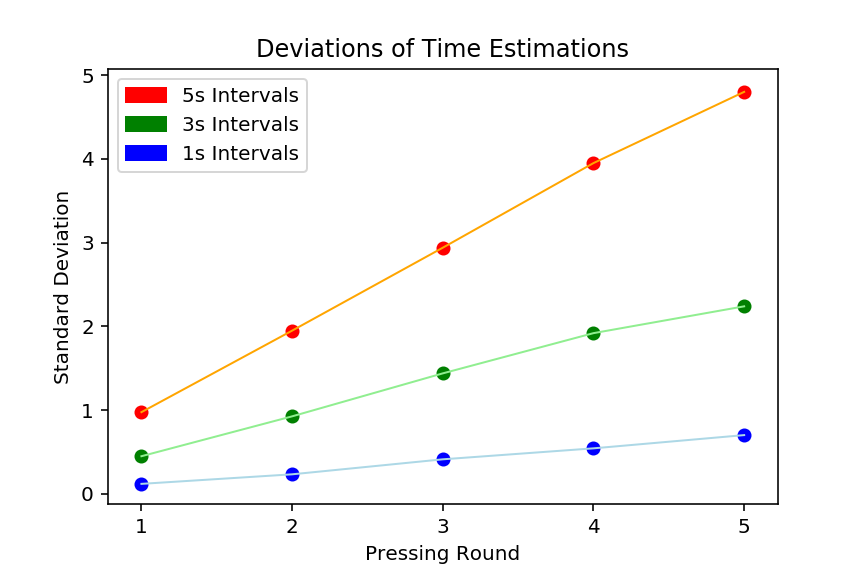

In [17]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set(title='Deviations of Time Estimations',
        xlabel='Pressing Round', 
        ylabel='Standard Deviation')
ax1.set_xticks([i for i in range(6)])
plt.show()

In [18]:
plt.plot(itv1['Round of Pressing'], 
         itv1['Standard Deviation'],
         linewidth=1,
         color='lightblue')

plt.scatter(itv1['Round of Pressing'], 
         itv1['Standard Deviation'],
         linewidth=1,
         color='blue')

In [19]:
plt.plot(itv3['Round of Pressing'], 
         itv3['Standard Deviation'],
         linewidth=1,
         color='lightgreen')

plt.scatter(itv3['Round of Pressing'], 
         itv3['Standard Deviation'],
         linewidth=1,
         color='green')

In [20]:
plt.plot(itv5['Round of Pressing'], 
         itv5['Standard Deviation'],
         linewidth=1,
         color='orange')

plt.scatter(itv5['Round of Pressing'], 
         itv5['Standard Deviation'],
         linewidth=1,
         color='red')

In [21]:
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [22]:
plt.savefig('stds.png',dpi=1000)

<IPython.core.display.Javascript object>


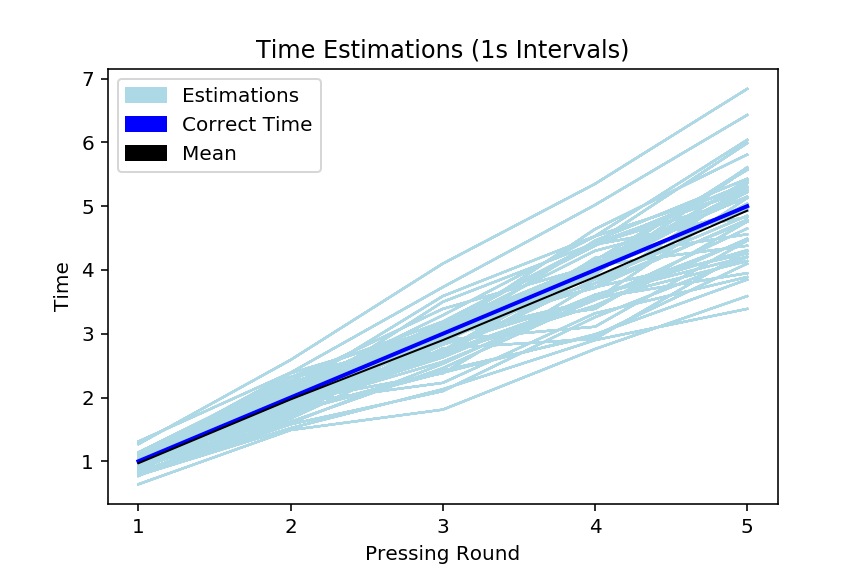

In [23]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set(title='Time Estimations (1s Intervals)',
        xlabel='Pressing Round', 
        ylabel='Time')
ax2.set_xticks([i for i in range(6)])
plt.show()

In [24]:
for person in list(df['Person']):
    line = df[(df['Person'] == person) & (df['Interval'] == 1)]
    plt.plot(line['Pressing Round'],
             line['Time'],
             color='lightblue',
             linewidth=1)

plt.plot([i for i in range(1, 6)],
         [i for i in range(1, 6)],
         color='blue',
         linewidth=2)

plt.plot(itv1['Round of Pressing'],
         itv1['Mean (s)'],
         color='black',
         linewidth=1)

In [25]:
plt.legend(handles=[
                mpatches.Patch(color='lightblue', label='Estimations'),
                mpatches.Patch(color='blue', label='Correct Time'),
                mpatches.Patch(color='black', label='Mean')])

In [26]:
plt.savefig('time_1s-intv.png',dpi=1000)

<IPython.core.display.Javascript object>


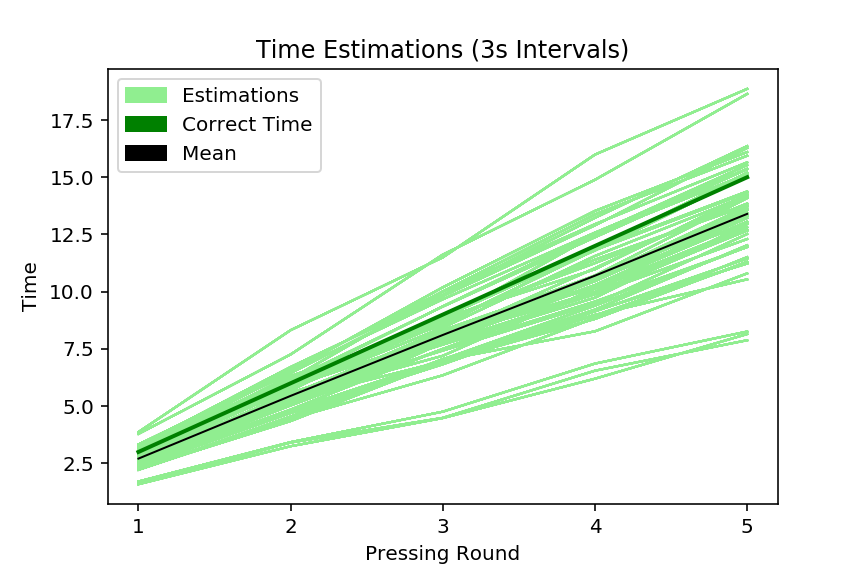

In [29]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set(title='Time Estimations (3s Intervals)',
        xlabel='Pressing Round', 
        ylabel='Time')
ax2.set_xticks([i for i in range(6)])
plt.show()

In [30]:
for person in list(df['Person']):
    line = df[(df['Person'] == person) & (df['Interval'] == 3)]
    plt.plot(line['Pressing Round'],
             line['Time'],
             color='lightgreen',
             linewidth=1)

plt.plot([i for i in range(1, 6)],
         [i for i in range(3, 16, 3)],
         color='green',
         linewidth=2)

plt.plot(itv3['Round of Pressing'],
         itv3['Mean (s)'],
         color='black',
         linewidth=1)

In [31]:
plt.legend(handles=[
                mpatches.Patch(color='lightgreen', label='Estimations'),
                mpatches.Patch(color='green', label='Correct Time'),
                mpatches.Patch(color='black', label='Mean')])

In [32]:
plt.savefig('time_3s-intv.png',dpi=1000)

<IPython.core.display.Javascript object>


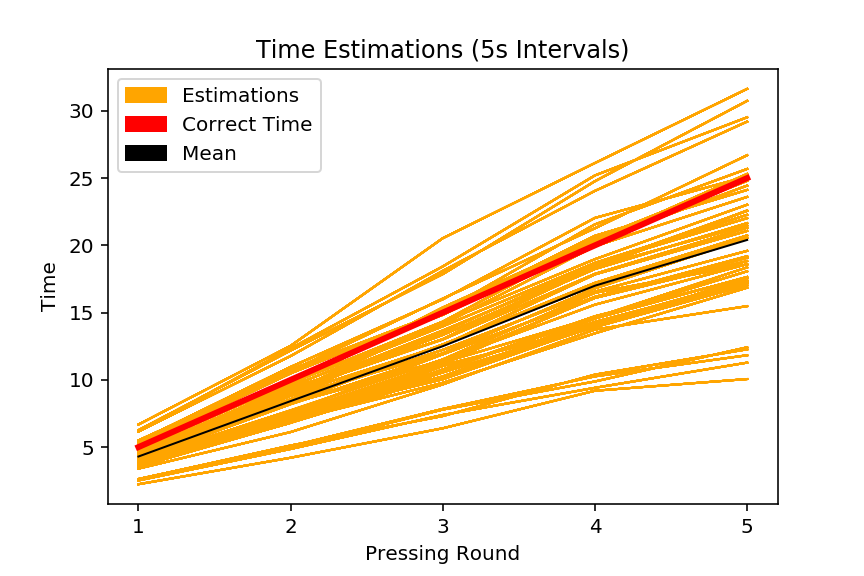

In [33]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set(title='Time Estimations (5s Intervals)',
        xlabel='Pressing Round', 
        ylabel='Time')
ax2.set_xticks([i for i in range(6)])
plt.show()

In [34]:
for person in list(df['Person']):
    line = df[(df['Person'] == person) & (df['Interval'] == 5)]
    plt.plot(line['Pressing Round'],
             line['Time'],
             color='orange',
             linewidth=1)

plt.plot([i for i in range(1, 6)],
         [i for i in range(5, 26, 5)],
         color='red',
         linewidth=3)

plt.plot(itv5['Round of Pressing'],
         itv5['Mean (s)'],
         color='black',
         linewidth=1)

In [35]:
plt.legend(handles=[
                mpatches.Patch(color='orange', label='Estimations'),
                mpatches.Patch(color='red', label='Correct Time'),
                mpatches.Patch(color='black', label='Mean')])

In [36]:
plt.savefig('time_5s-intv.png',dpi=1000)

<IPython.core.display.Javascript object>


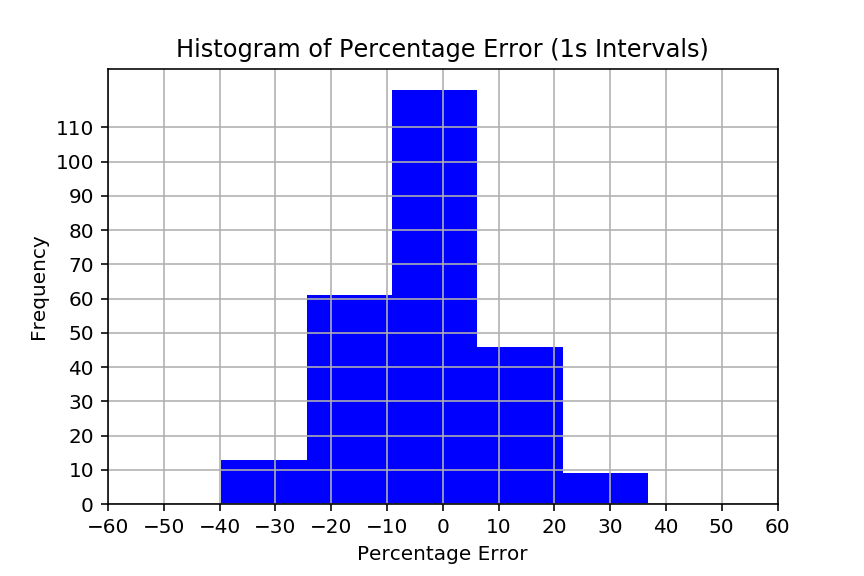

In [52]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set(title='Histogram of Percentage Error (1s Intervals)',
        xlabel='Percentage Error', 
        ylabel='Frequency')
plt.show()

In [53]:
plt.hist(df[df['Interval'] == 1]['PCT Error'], 
         bins=5, 
         color='blue')
plt.grid(True)

In [54]:
ax2.set_xticks([i for i in range(-60, 61, 10)])
ax2.set_yticks([i for i in range(0, 120, 10)])

In [55]:
plt.savefig('pctError_1s-intv.png',dpi=1000)

<IPython.core.display.Javascript object>


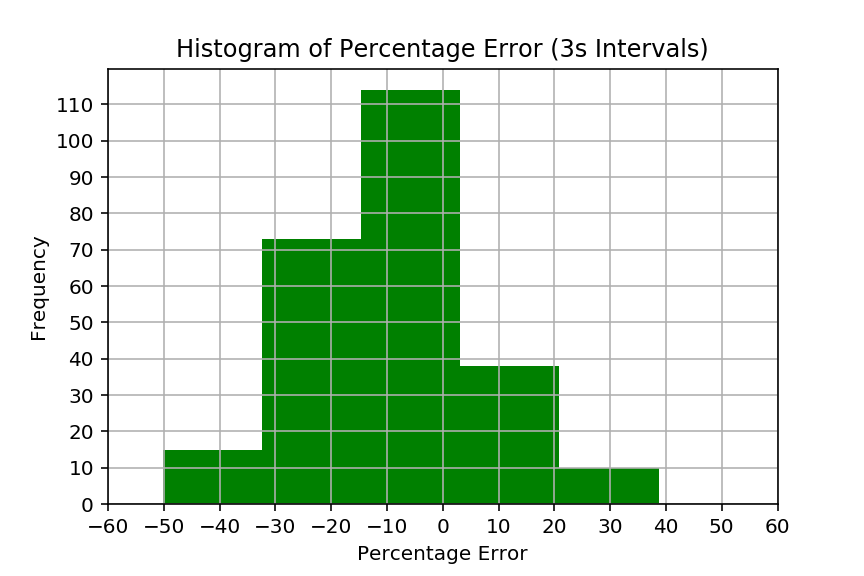

In [56]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set(title='Histogram of Percentage Error (3s Intervals)',
        xlabel='Percentage Error', 
        ylabel='Frequency')
plt.show()

In [57]:
plt.hist(df[df['Interval'] == 3]['PCT Error'], 
         bins=5, 
         color='green')
plt.grid(True)

In [58]:
ax2.set_xticks([i for i in range(-60, 61, 10)])
ax2.set_yticks([i for i in range(0, 120, 10)])

In [59]:
plt.savefig('pctError_3s-intv.png',dpi=1000)

<IPython.core.display.Javascript object>


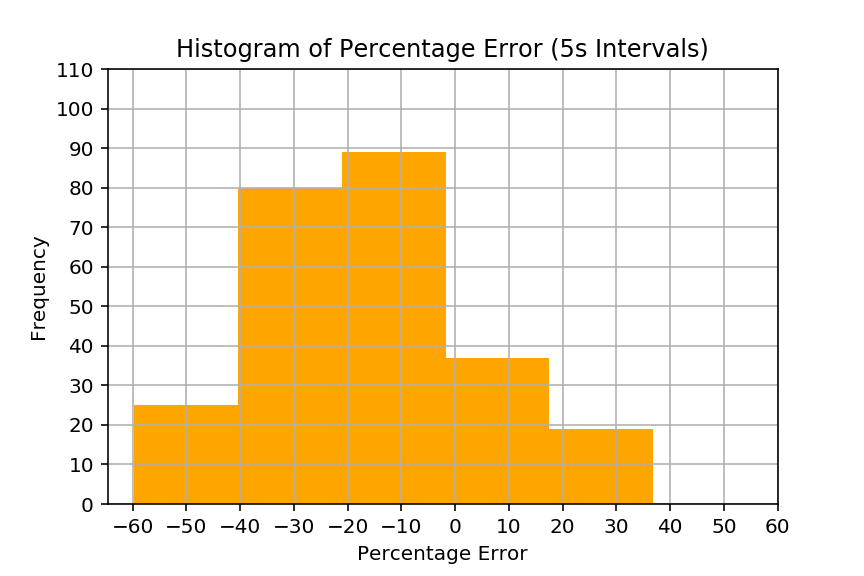

In [60]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set(title='Histogram of Percentage Error (5s Intervals)',
        xlabel='Percentage Error', 
        ylabel='Frequency')
plt.show()

In [61]:
plt.hist(df[df['Interval'] == 5]['PCT Error'], 
         bins=5, 
         color='orange')
plt.grid(True)

In [62]:
ax2.set_xticks([i for i in range(-60, 61, 10)])
ax2.set_yticks([i for i in range(0, 120, 10)])

In [63]:
plt.savefig('pctError_5s-intv.png',dpi=1000)